In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [111]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1, n_targets=1,noise=80,random_state=13)

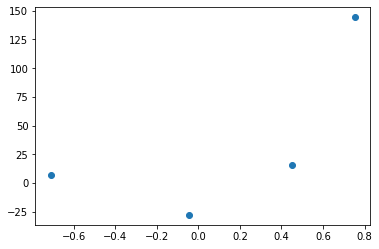

In [127]:
plt.scatter(X,y)

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lr=LinearRegression()

In [130]:
#lets apply ols
lr.fit(X,y)
print('slope=',lr.coef_)
print("Intercept=",lr.intercept_) 

slope= [78.35063668]
Intercept= 26.15963284313262


In [108]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

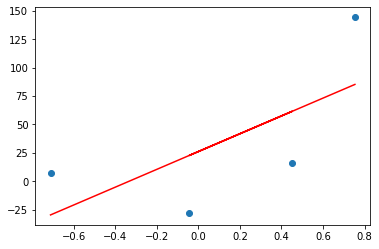

In [131]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red') #this will draw a regression line

In [119]:
#Let apply GradientDescent assuming slope to be constant m=28.12597332
#and lets assume our starting value of intercept b =100
y_pred=((78.35*X)+0).reshape(4)

AttributeError: 'float' object has no attribute 'predict'

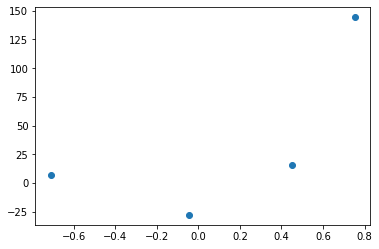

In [120]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='black',label='b=0')
plt.legend()
plt.show()

In [79]:
m=28.125
b=10
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

2462.4172473751187

In [80]:
lr=0.01
step_size=loss_slope*lr
step_size

24.624172473751187

In [81]:
b=100-step_size
b
#first iteration now b is

75.37582752624881

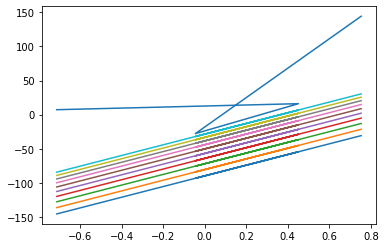

In [132]:
b=-100
m=78.35
lr=0.01
epochs=10

for i in range(epochs):
    loss_slope=-2*np.sum(y-m*X.ravel()-b)
    step_size=lr*loss_slope
    b=b-step_size
    y_pred=(m*X+b)
    
    plt.plot(X,y_pred)
plt.plot(X,y)

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [161]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1, n_targets=1,noise=20)

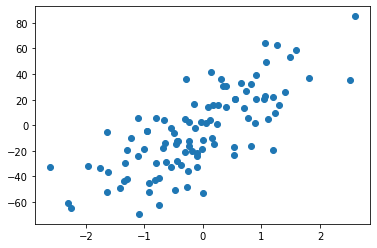

In [162]:
plt.scatter(X,y)

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [164]:
lr=LinearRegression()
lr.fit(X,y)
print("Slope=",lr.coef_)
print("Intercept=",lr.intercept_)

Slope= [23.6703473]
Intercept= -2.6036866348154977


In [165]:
m=23.67

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [184]:
class GDRegreesor:
    
    def __init__(self,learning_rate,epochs):
        self.lr=learning_rate
        self.epochs=epochs
        self.m=23.67
        self.b=-120
        
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope=-2*np.sum(y-self.m*X.ravel()-self.b)
            step_size=self.lr*loss_slope
            self.b=self.b-step_size
            print(loss_slope,self.b)
        print(self.b)

In [187]:
gd=GDRegreesor(0.001,10)

In [188]:
gd.fit(X,y)

-23479.255486977916 -96.52074451302208
-18783.404389582338 -77.73734012343974
-15026.723511665869 -62.710616611773865
-12021.378809332691 -50.68923780244117
-9617.103047466155 -41.07213475497501
-7693.6824379729205 -33.378452317002086
-6154.945950378338 -27.22350636662375
-4923.956760302669 -22.29954960632108
-3939.165408242136 -18.360384198078943
-3151.3323265937083 -15.209051871485235
-15.209051871485235


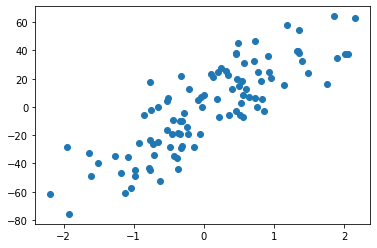

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

X,y=make_regression(n_samples=100,n_features=1,n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [209]:
lr=LinearRegression()

In [210]:
lr.fit(X_train,y_train)
print("Slope=",lr.coef_)
print("Inercept=",lr.intercept_)


Slope= [28.12597332]
Inercept= -2.2710144261783825


In [213]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.6345158782661012

In [216]:
class GDRegreesor:
    
    def __init__(self,learning_rate,epochs):
        self.lr=learning_rate
        self.epochs=epochs
        self.m=100
        self.b=-120
        
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
            #print(loss_slope,self.b)
        print(self.b,self.m)
        
    def predict(self,X):
        return self.m*X+self.b

In [220]:
gd=GDRegreesor(0.001,40)

In [221]:
gd.fit(X_train,y_train)

-2.4226862718420876 28.28462689117196


In [222]:
y_pred=gd.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.6338531280122912